In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import b_value_functions1 as b_value_functions # these are the functions in the .py file 
from datetime import datetime

In [2]:
# Read in the example catalog 
catalog = pd.read_csv(r"D:\Yihe\wetransfer_data-induced-seismicity_2024-10-03_1331\UTAH\2022\Dyer_Karvounis_Bethmann_April_2022_UtahFORGE\forgest3in.csv")
#catalog

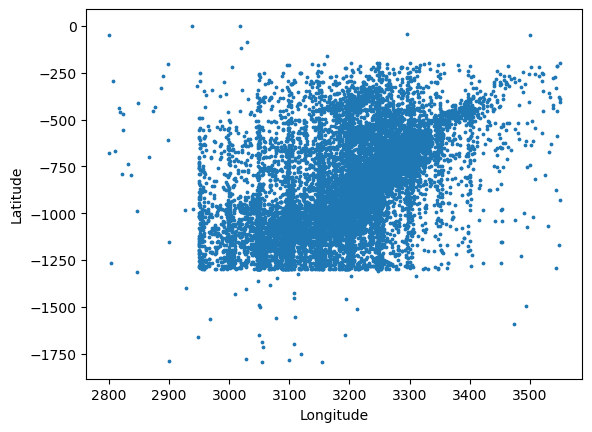

In [3]:
plt.scatter(catalog["X"],catalog["Y"],s=3)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [4]:
from datetime import timedelta
# create injection end time
stInj = datetime(2022,4,21,12,48,22)
timd = timedelta(minutes=281.0167)
injEnd = ((stInj+timd)-stInj).total_seconds()/86400.0
print(injEnd)
injSt= stInj.timestamp()/86400.0
print(injSt)
print((stInj+timd).timestamp()/86400-injSt)

0.1951504861111111
19103.825254629628
0.19515048611356178


In [5]:
dt=[]
dto=[]
for i in range(len(catalog["Origin Date"])):
    
    date = list(map(int,catalog["Origin Date"][i].strip().split("/")))
    time = list(map(float,catalog["Origin Time"][i].strip().split(":")))
    #print(date,time)
    dtTemp = (datetime(date[2],date[1],date[0],int(time[0]),int(time[1]),int(time[2])))
    dt.append(dtTemp.timestamp()/86400-injSt)
    dto.append(dtTemp)

print(len(dt))

13136


In [6]:
# Filters all arrays according to injection start and end dates, chatgpt assisted
dtF, magF, xf, yf, depf,  = zip(*[
    (d, m, x, y, dp)
    for d, m, x, y, dp in zip(dt, catalog['MomMag'], catalog['X'], catalog['Y'], catalog['Depth'])
    if injSt-injSt <= d <= injEnd
])
print(len(magF),len(dtF))

7295 7295


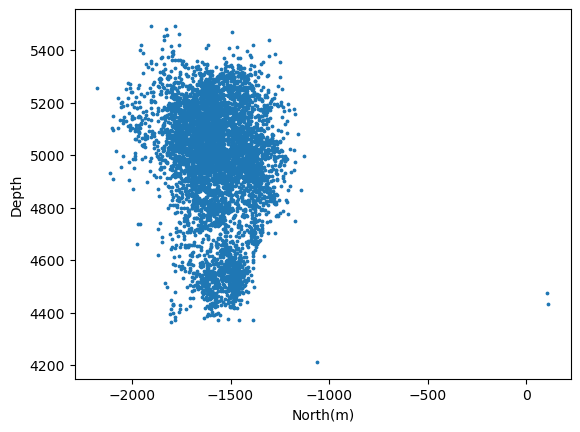

In [5]:
plt.scatter(catalog["North(m)"],catalog["Depth (m)"],s=3)
plt.xlabel("North(m)")
plt.ylabel("Depth")
plt.show()

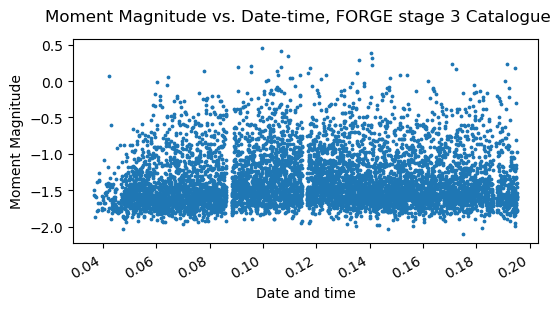

In [8]:
figure = plt.figure(figsize = [6,3])
ax1 = figure.add_subplot(111)
ax1.scatter(dtF,magF,s=3)
figure.suptitle("Moment Magnitude vs. Date-time, FORGE stage 3 Catalogue")
ax1.set_xlabel("Date and time")
ax1.set_ylabel("Moment Magnitude")
#ax1.set_xlim([datetime(2022,4,21,13),datetime(2022,4,22)])
figure.autofmt_xdate()
plt.show()

In [9]:
import statistics
xref = statistics.median(xf[1:11])
yref = statistics.median(yf[1:11])
zref = statistics.median(depf[1:11])
print(xref,yref,zref)

3154.0 -844.0 8223.0


In [10]:
dist = np.sqrt((np.array(xf)-xref)**2+(np.array(yf)-yref)**2+(np.array(depf)-zref)**2)
print(len(dist))

7295


2006-12-03 18:57:03


In [11]:
# bin stuff
bins = np.arange(-2, 6, 0.1)
mid_bins = (bins[:-1] + bins[1:])/2

In [12]:
def quicksort_with_swaps(arr1, arr2, low, high):
    if low < high:
        # Partition the arrays and get the pivot index
        pivot_index = partition(arr1, arr2, low, high)

        # Recursively sort the subarrays on both arrays
        quicksort_with_swaps(arr1, arr2, low, pivot_index)
        quicksort_with_swaps(arr1, arr2, pivot_index + 1, high)

def partition(arr1, arr2, low, high):
    # Choose the pivot as the middle element
    pivot = arr1[(low + high) // 2]
    i = low - 1
    j = high + 1

    while True:
        i += 1
        while arr1[i] < pivot:
            i += 1

        j -= 1
        while arr1[j] > pivot:
            j -= 1

        if i >= j:
            return j

        # Swap elements in both arrays
        arr1[i], arr1[j] = arr1[j], arr1[i]
        arr2[i], arr2[j] = arr2[j], arr2[i]

# Example usage:
array1 = [3, 1, 4, 1, 5, 9, 2, 6]
array2 = ['c', 'a', 'd', 'a', 'e', 'i', 'b', 'f']

quicksort_with_swaps(array1, array2, 0, len(array1) - 1)

print("Sorted array1:", array1)
print("Corresponding sorted array2:", array2)

def quicksort(arr):
    if len(arr) <= 1:
        return arr
    
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    
    return quicksort(left) + middle + quicksort(right)

Sorted array1: [1, 1, 2, 3, 4, 5, 6, 9]
Corresponding sorted array2: ['a', 'a', 'b', 'c', 'd', 'e', 'f', 'i']


In [13]:
Mw = np.copy(np.array(magF))
print(len(Mw))

7295


In [14]:
print(DT[0],DT[-1])

2022-04-21 13:41:21 2022-04-21 05:56:37


In [14]:
#dist = np.sqrt((np.array(X)-xref)**2+(np.array(Y)-yref)**2+(np.array(Z)-zref)**2)
print(len(dist))

7295


In [16]:
# Sort array based on 90th percentile mimicking method from Danre et al 2022
# find 90th percentile and above for every 50 events, build 4 array (percentile and non percentile)
percM =[]
percT =[]
percD=[]
rstM =[]
rstT =[]
rstD =[]
dtF = np.array(dtF)

for z in range(50,len(dtF)-50,50):
    #print(i,len(catalog["Time"]))
    #print(z)
    subDist=np.array(dist[z-50:z].copy())
    subTime=np.array(dtF[z-50:z].copy())
    subDstRef=[x for x in range(z-50,z)]
    quicksort_with_swaps(subDist, subDstRef, 0, len(subDist)-1)
    
    pM=[]
    pT=[]
    pD=[]
    rM=[]
    rT=[]
    rD=[]
    for y in range(50):
        if y<45:
            rM.append(Mw[subDstRef[y]])
            rT.append(dtF[subDstRef[y]])
            rstD.append(dist[subDstRef[y]])
        if y>=45:
            pM.append(Mw[subDstRef[y]])
            pT.append(dtF[subDstRef[y]])
            pD.append(dist[subDstRef[y]])
    percM += pM
    percT += pT
    percD += pD
    rstM += rM
    rstT += rT
    rstD += rD

In [17]:
print(len(rstM))

6480


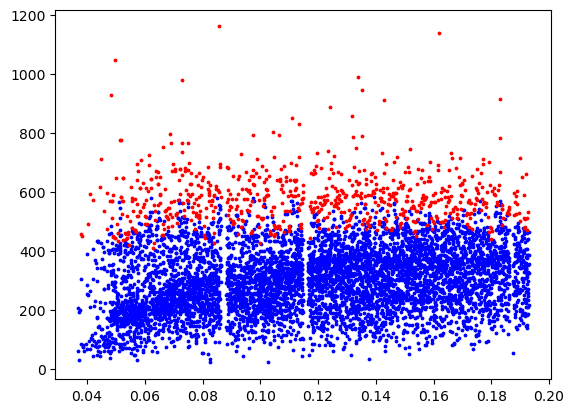

In [18]:
plt.scatter(rstT,rstD,c='b',s=3)
plt.scatter(percT,percD,c='r',s=3)

plt.show()

In [19]:
pbp=[]
plbp=[]
phbp=[]
pstdp=[]
pb=[]
plb=[]
phb=[]
pstd=[]
pdtr=[]

quicksort_with_swaps(percT,percM,0,len(percT)-1)
for i in range(300,len(percM),30):
    print(i)
    mxt=[]
    md=0
    for x in range(i-300,i):
        mxt.append(percM[x])
    mxT=np.array(mxt)
    b, Mc, hist = b_value_functions.btrad(mxT, bins, delta_b = 0.01)
    hist1, bP = b_value_functions.bpos(mxT)
    low_b, high_b, std = b_value_functions.bootstrap(mxT, np.arange(-2, 6, 0.1), 1000, 'btrad', delta_b = 0.00001)    
    low_bp, high_bp, stdp = b_value_functions.bootstrap(mxT, np.arange(-2, 6, 0.1), 1000, 'bpos', delta_b = 0.00001)
    pb.append(b)
    pdtr.append(percT[i])
    pbp.append(bP)
    plb.append(low_b)
    plbp.append(low_bp)
    phb.append(high_b)
    phbp.append(high_bp)
    pstd.append(std)
    pstdp.append(stdp)

300
330
360
390
420
450
480
510
540
570
600
630
660
690


In [20]:
rbp=[]
rlbp=[]
rhbp=[]
rstdp=[]
rb=[]
rlb=[]
rhb=[]
rstd=[]
rdtr=[]
print(len(rstM))
quicksort_with_swaps(rstT,rstM,0,len(rstT)-1)
for i in range(300,len(rstM),30):
    #print(i)
    mxt=[]
    md=0
    for x in range(i-300,i):
        mxt.append(rstM[x])
    mxT=np.array(mxt)
    b, Mc, hist = b_value_functions.btrad(mxT, bins, delta_b = 0.01)
    hist1, bP = b_value_functions.bpos(mxT)
    low_b, high_b, std = b_value_functions.bootstrap(mxT, np.arange(-2, 6, 0.1), 1000, 'btrad', delta_b = 0.00001)    
    low_bp, high_bp, stdp = b_value_functions.bootstrap(mxT, np.arange(-2, 6, 0.1), 1000, 'bpos', delta_b = 0.00001)
    rb.append(b)
    rdtr.append(rstT[i])
    rbp.append(bP)
    rlb.append(low_b)
    rlbp.append(low_bp)
    rhb.append(high_b)
    rhbp.append(high_bp)
    rstd.append(std)
    rstdp.append(stdp)

6480


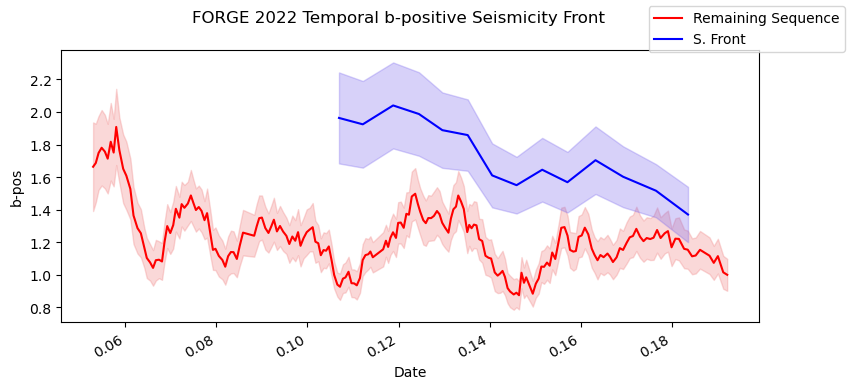

In [21]:
fig, ax1 = plt.subplots(figsize=(9,4))
fig.suptitle("FORGE 2022 Temporal b-positive Seismicity Front")
ax1.plot(rdtr,rbp,color="red", label = 'Remaining Sequence')
ax1.fill_between(rdtr, np.subtract(rbp,rstdp), np.add(rbp,rstdp), alpha = 0.3, color = 'lightcoral')
ax1.plot(pdtr,pbp,color="blue", label='S. Front')
ax1.fill_between(pdtr, np.subtract(pbp,pstdp), np.add(pbp,pstdp), alpha = 0.3, color = 'mediumslateblue')
#ax1.set_xlim([2,20])
#ax1.set_ylim([1,2])
fig.autofmt_xdate()
ax1.set_ylabel('b-pos')
ax1.set_xlabel('Date')
fig.autofmt_xdate()
fig.legend(loc = 'upper right')
plt.show()

In [23]:
rstM1 = np.array(rstM)
b, Mc, hist = b_value_functions.btrad(rstM1, bins, delta_b = 0.01)
hist1, bP = b_value_functions.bpos(rstM1)
low_b, high_b, std = b_value_functions.bootstrap(rstM1, np.arange(-2, 6, 0.1), 1000, 'btrad', delta_b = 0.00001)    
low_bp, high_bp, stdp = b_value_functions.bootstrap(rstM1, np.arange(-2, 6, 0.1), 1000, 'bpos', delta_b = 0.00001)
print(b,low_b,high_b, std)
print(bP,low_bp,high_bp, stdp)

1.0654272416996706 1.0481354136549097 1.120326015245288 0.01810990663061611
1.1964287208963174 1.1475434320579248 1.246035226365631 0.025781448062075028


1.0654272416996706 1.0481354136549097 1.120326015245288 0.01810990663061611
1.1964287208963174 1.1475434320579248 1.246035226365631 0.025781448062075028

In [24]:
percM1 = np.array(percM)
b, Mc, hist = b_value_functions.btrad(percM1, bins, delta_b = 0.01)
hist1, bP = b_value_functions.bpos(percM1)
low_b, high_b, std = b_value_functions.bootstrap(percM1, np.arange(-2, 6, 0.1), 1000, 'btrad', delta_b = 0.00001)    
low_bp, high_bp, stdp = b_value_functions.bootstrap(percM1, np.arange(-2, 6, 0.1), 1000, 'bpos', delta_b = 0.00001)
print(b,low_b,high_b, std)
print(bP,low_bp,high_bp, stdp)

1.712486265184766 1.3172438308820027 1.986255717322495 0.1783683091443495
1.6571763125255663 1.4332861675127697 1.943122947897041 0.1339203215182502


1.712486265184766 1.3172438308820027 1.986255717322495 0.1783683091443495
1.6571763125255663 1.4332861675127697 1.943122947897041 0.1339203215182502

In [38]:
# 90th percentile:
# rst: 1.0699898261576652 1.059129386932117 1.1072108108400873 0.012202113637447156
# perc: 1.3419705350943831 1.179001038937336 1.5024964599272486 0.08051234185203478
#bp 
#rst 1.197167647308681 1.1572254434702078 1.2355611212843665 0.019932216650467748
#perc 1.5210015387073645 1.3517484323506008 1.731561758237987 0.09762033681703913
# 80th percentile:
# rst: 1.0569834360586132 1.0443706345817199 1.0953362171016372 0.012798045247823627
# perc: 1.3113746969263764 1.2336281142647014 1.4197062253085917 0.048127752466422875
# bp
# rst 1.1974338809402696 1.1587086687086858 1.2394659061581221 0.020635254236709734
# perc 1.5154060853320057 1.3830855870331207 1.672324069717648 0.0742382456371726

In [ ]:
# add the sort lines sstuff in, changes the shape of the graphs and lightly changes the b-value sampling and error bars
# needs to be done for base ssfs 1993, 95, basel, all the coopers.....

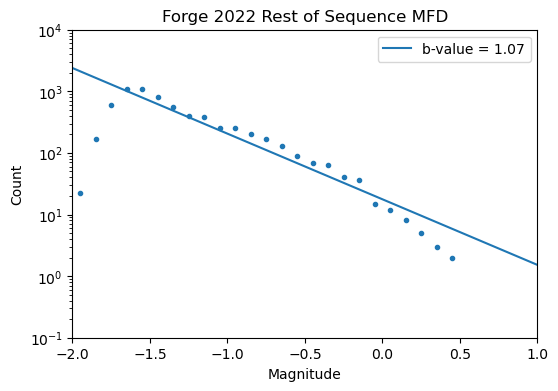

In [25]:
bins = np.arange(-2, 6, 0.1)
b, Mc, hist = b_value_functions.btrad(rstM1, bins, delta_b = 0.01)
x = bins
y_Mc = hist[0][np.argmax(hist[0])+2]
a = np.log10(y_Mc) + b*Mc

best_fit = 10**(a-b*x)

mid_bins = (bins[:-1] + bins[1:])/2

# Plot results 
figure = plt.figure(figsize = [6,4])
ax1 = figure.add_subplot(111)

ax1.scatter(mid_bins, hist[0], marker = '.')
ax1.plot(x, best_fit, label = 'b-value = '+str(np.round(b,2)))

ax1.set_xlim([-2, 1])
ax1.set_ylim([10**-1, 10**4])

ax1.set_yscale('log')
ax1.legend(loc = 'upper right')

ax1.set_xlabel('Magnitude')
ax1.set_ylabel('Count')
ax1.set_title('Forge 2022 Rest of Sequence MFD')
plt.show()

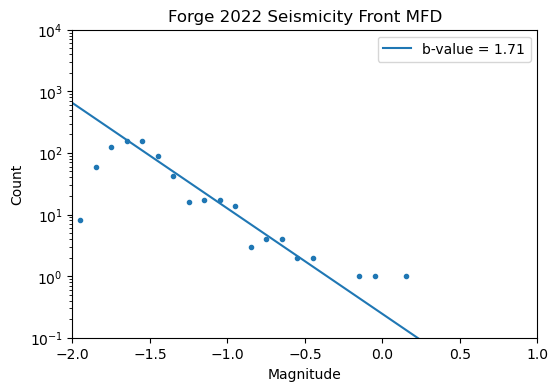

In [26]:
bins = np.arange(-2, 6, 0.1)
b, Mc, hist = b_value_functions.btrad(percM1, bins, delta_b = 0.01)
x = bins
y_Mc = hist[0][np.argmax(hist[0])+2]
a = np.log10(y_Mc) + b*Mc

best_fit = 10**(a-b*x)

mid_bins = (bins[:-1] + bins[1:])/2

# Plot results 
figure = plt.figure(figsize = [6,4])
ax1 = figure.add_subplot(111)

ax1.scatter(mid_bins, hist[0], marker = '.')
ax1.plot(x, best_fit, label = 'b-value = '+str(np.round(b,2)))

ax1.set_xlim([-2, 1])
ax1.set_ylim([10**-1, 10**4])

ax1.set_yscale('log')
ax1.legend(loc = 'upper right')

ax1.set_xlabel('Magnitude')
ax1.set_ylabel('Count')
ax1.set_title('Forge 2022 Seismicity Front MFD')
plt.show()